<a href="https://colab.research.google.com/github/deepanshudaw/Adversarial-Attacks/blob/master/Keras_Hierarchical_confmat_stages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing uselful libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time

In [0]:
mnist = keras.datasets.mnist

In [0]:
(train_images, train_label), (test_images, test_label) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Scaling the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
distortion_list = [0,0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.7]
model=[]
model.insert(0,"Deepanshu")

#Distorting

In [0]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def colourmat(pred,test_label):
  cm = confusion_matrix(pred, test_label)
  np.set_printoptions(precision=2)
  print('Confusion matrix')
  print(cm)
  plt.figure()
  plot_confusion_matrix(cm,np.unique(test_label), title='Confusion matrix')
  plt.show()

In [0]:
def Hdistort(test,distortion,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s=np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test.reshape(1,28,28)

def create_dist(test_images,test_lbl,model_no):
  dist_test = np.empty([test_lbl.shape[0],28,28])
  acc = []
  
  test=np.empty([test_lbl.shape[0],28,28])
  for i in range(test_lbl.shape[0]):
    for j in range(28):
      for k in range(28):
        test[i][j][k]=test_images[i][j][k]
  test=test.reshape(test_lbl.shape[0],784)
  
  for j,distortion in enumerate(distortion_list):
    dist_test = np.empty([test_lbl.shape[0],28,28])
    for i in range(test_lbl.shape[0]):
      dist_test[i] = Hdistort(test,distortion,i)
    pred=np.argmax(model[model_no].predict(dist_test),axis=1)
    test_acc=accuracy_score(pred,test_lbl)
    acc.insert(j,test_acc)
    print("Distortion: ",distortion,"                  ","Accuracy:  ",test_acc)
    colourmat(pred,test_lbl)
    print()
    print("---------------------------------------------------------")

#Classification of circle vs non circle 

```
Model1
```



In [0]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])


In [0]:
model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_label_h1=np.empty([60000,])
for i in range(60000):
  if train_label[i]==1 or train_label[i]==2 or train_label[i]==3 or train_label[i]==4 or train_label[i]==5 or train_label[i]==7:    #||3||4||5||7
    train_label_h1[i]=0
  else:
    train_label_h1[i]=1
    
test_label_h1=np.empty([10000,])
for i in range(10000):
  if test_label[i]==1 or test_label[i]==2 or test_label[i]==3 or test_label[i]==4 or test_label[i]==5 or test_label[i]==7:    #||3||4||5||7
    test_label_h1[i]=0
  else:
    test_label_h1[i]=1

In [0]:
model1.fit(train_images, train_label_h1, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1244 - acc: 0.9542
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0563 - acc: 0.9809
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0394 - acc: 0.9867
Epoch 4/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0303 - acc: 0.9901
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0231 - acc: 0.9925


In [0]:
test_loss, test_acc = model1.evaluate(test_images, test_label_h1)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 48us/sample - loss: 0.0488 - acc: 0.9845
Test accuracy: 0.9845


Distortion:  0                    Accuracy:   0.9845
Confusion matrix
[[5993   69]
 [  86 3852]]


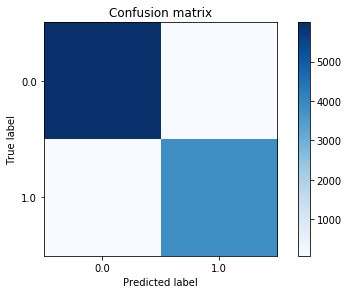


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9828
Confusion matrix
[[5982   75]
 [  97 3846]]


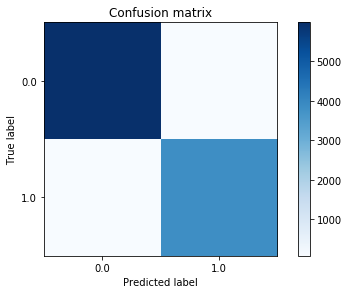


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9753
Confusion matrix
[[5962  130]
 [ 117 3791]]


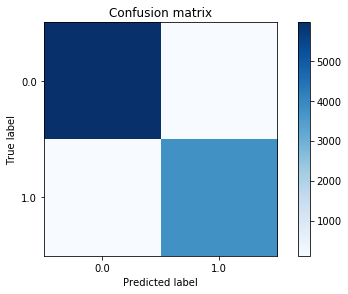


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.959
Confusion matrix
[[5905  236]
 [ 174 3685]]


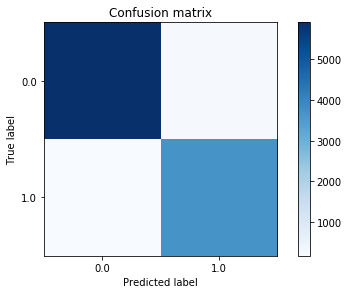


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.927
Confusion matrix
[[5806  457]
 [ 273 3464]]


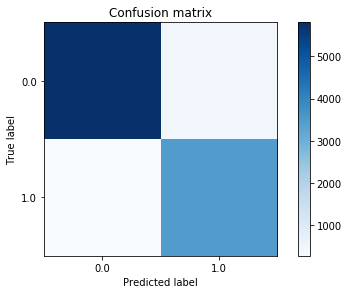


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.8845
Confusion matrix
[[5726  802]
 [ 353 3119]]


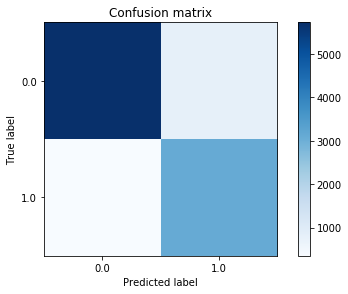


---------------------------------------------------------
Distortion:  0.25                    Accuracy:   0.8372
Confusion matrix
[[5646 1195]
 [ 433 2726]]


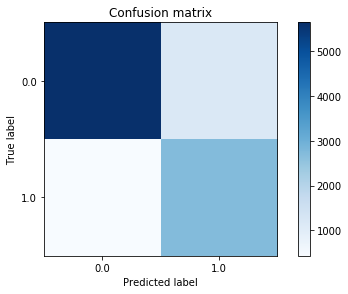


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7853
Confusion matrix
[[5620 1688]
 [ 459 2233]]


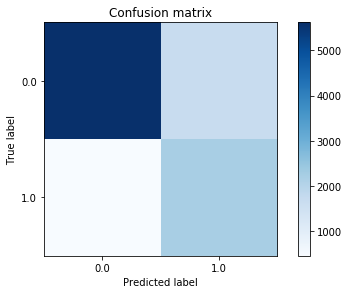


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.7379
Confusion matrix
[[5579 2121]
 [ 500 1800]]


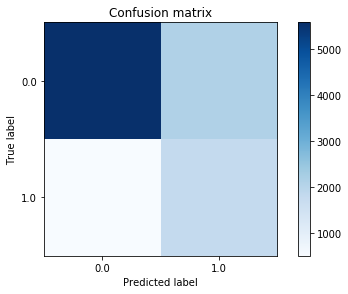


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.698
Confusion matrix
[[5629 2570]
 [ 450 1351]]


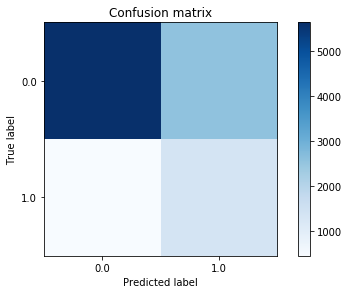


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.609
Confusion matrix
[[6042 3873]
 [  37   48]]


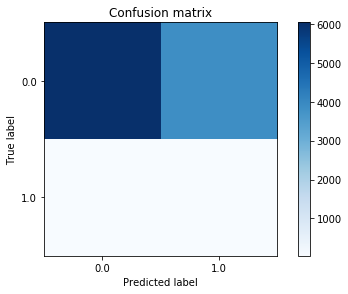


---------------------------------------------------------


In [0]:
model.insert(1,model1)
create_dist(test_images,test_label_h1,1)

#Classification of 08 or 69

 *Model 2*



In [0]:
train_images_h2=np.empty([23641,28,28])
test_images_h2=np.empty([3921,28,28])
train_label_h2=np.empty([23641,])
test_label_h2=np.empty([3921,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==0 or train_label[i]==8:   
    train_label_h2[j]=0
    train_images_h2[j]=train_images[i]
    j=j+1
  elif train_label[i]==6 or train_label[i]==9:
    train_label_h2[j]=1
    train_images_h2[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==0 or test_label[i]==8:   
    test_label_h2[j]=0
    test_images_h2[j]=test_images[i]
    j=j+1
  elif test_label[i]==6 or test_label[i]==9:
    test_label_h2[j]=1
    test_images_h2[j]=test_images[i]
    j=j+1
print(j)   

23641
3921


In [0]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model2.fit(train_images_h2, train_label_h2, epochs=5)

Epoch 1/5
23641/23641 [==============================] - 2s 86us/sample - loss: 0.0848 - acc: 0.9714
Epoch 2/5
23641/23641 [==============================] - 2s 77us/sample - loss: 0.0380 - acc: 0.9867
Epoch 3/5
23641/23641 [==============================] - 2s 81us/sample - loss: 0.0262 - acc: 0.9909
Epoch 4/5
23641/23641 [==============================] - 2s 86us/sample - loss: 0.0193 - acc: 0.9940
Epoch 5/5
23641/23641 [==============================] - 2s 85us/sample - loss: 0.0147 - acc: 0.9953


In [0]:
test_loss, test_acc = model2.evaluate(test_images_h2, test_label_h2)
print('Test accuracy:', test_acc)

3921/3921 [==============================] - 0s 71us/sample - loss: 0.0314 - acc: 0.9890
Test accuracy: 0.9890334


The distortion Testing:

Distortion:  0                    Accuracy:   0.9890334098444274
Confusion matrix
[[1933   22]
 [  21 1945]]


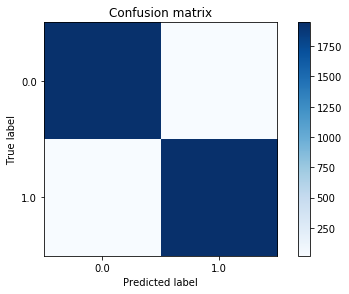


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9885233358837031
Confusion matrix
[[1929   20]
 [  25 1947]]


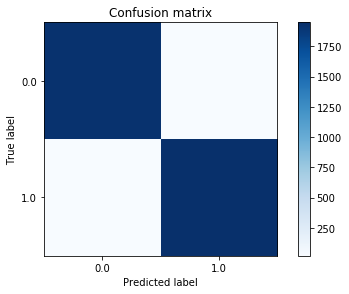


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9813823004335629
Confusion matrix
[[1899   18]
 [  55 1949]]


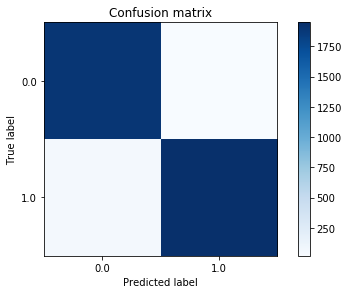


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9597041571027799
Confusion matrix
[[1805    9]
 [ 149 1958]]


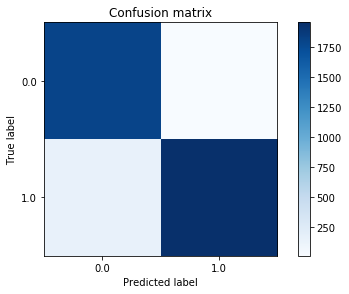


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9204284621270085
Confusion matrix
[[1649    7]
 [ 305 1960]]


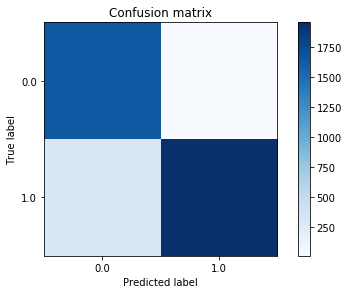


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.8530986993114001
Confusion matrix
[[1386    8]
 [ 568 1959]]


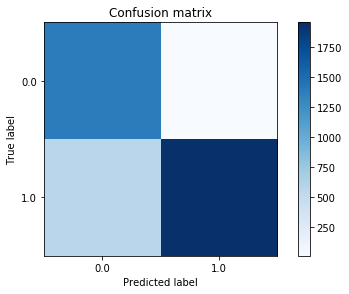


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.682223922468758
Confusion matrix
[[ 709    1]
 [1245 1966]]


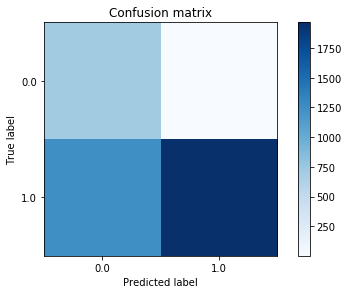


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6059678653404744
Confusion matrix
[[ 412    3]
 [1542 1964]]


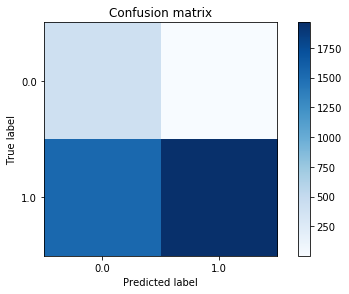


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5562356541698547
Confusion matrix
[[ 215    1]
 [1739 1966]]


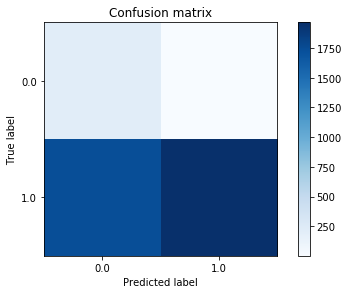


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.501657740372354
Confusion matrix
[[   0    0]
 [1954 1967]]


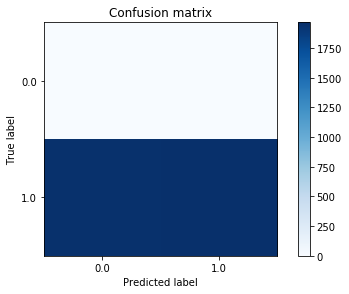


---------------------------------------------------------


In [0]:
model.insert(2,model2)
create_dist(test_images_h2,test_label_h2,2)

#Classification of 8 and 0
*Model 3*

In [0]:
train_images_h3=np.empty([11774,28,28])
test_images_h3=np.empty([1954,28,28])
train_label_h3=np.empty([11774,])
test_label_h3=np.empty([1954,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==0:
    train_label_h3[j]=0
    train_images_h3[j]=train_images[i]
    j=j+1
  elif train_label[i]==8:
    train_label_h3[j]=1
    train_images_h3[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==0:   
    test_label_h3[j]=0
    test_images_h3[j]=test_images[i]
    j=j+1
  elif test_label[i]==8:
    test_label_h3[j]=1
    test_images_h3[j]=test_images[i]
    j=j+1
print(j)   

11774
1954


In [0]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model3.fit(train_images_h3, train_label_h3, epochs=5)

Epoch 1/5
11774/11774 [==============================] - 1s 88us/sample - loss: 0.0439 - acc: 0.9838
Epoch 2/5
11774/11774 [==============================] - 1s 90us/sample - loss: 0.0161 - acc: 0.9952
Epoch 3/5
11774/11774 [==============================] - 1s 88us/sample - loss: 0.0108 - acc: 0.9968
Epoch 4/5
11774/11774 [==============================] - 1s 86us/sample - loss: 0.0089 - acc: 0.9972
Epoch 5/5
11774/11774 [==============================] - 1s 79us/sample - loss: 0.0074 - acc: 0.9976


In [0]:
test_loss, test_acc = model3.evaluate(test_images_h3, test_label_h3)
print('Test accuracy:', test_acc)

1954/1954 [==============================] - 0s 66us/sample - loss: 0.0217 - acc: 0.9913
Test accuracy: 0.9912999


Distortion:  0                    Accuracy:   0.9912998976458547
Confusion matrix
[[977  14]
 [  3 960]]


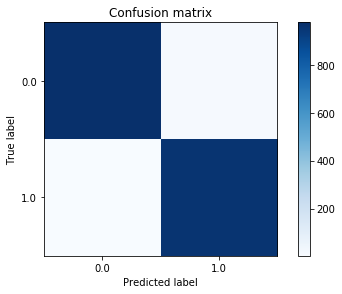


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9918116683725691
Confusion matrix
[[977  13]
 [  3 961]]


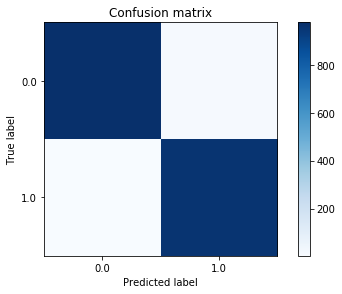


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9943705220061413
Confusion matrix
[[978   9]
 [  2 965]]


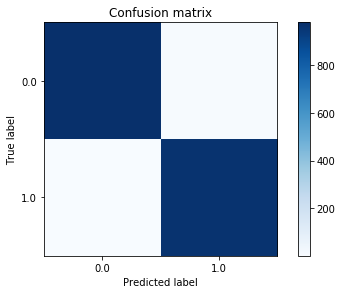


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9928352098259979
Confusion matrix
[[977  11]
 [  3 963]]


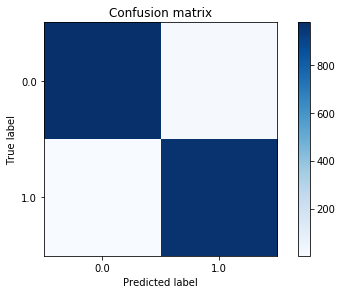


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9928352098259979
Confusion matrix
[[972   6]
 [  8 968]]


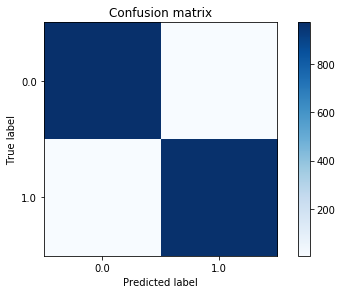


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9912998976458547
Confusion matrix
[[969   6]
 [ 11 968]]


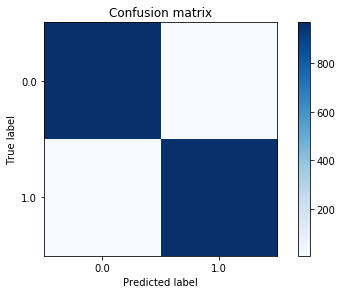


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.9636642784032753
Confusion matrix
[[911   2]
 [ 69 972]]


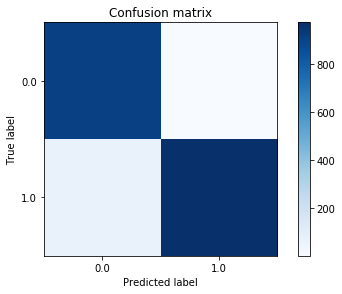


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9462640736949847
Confusion matrix
[[876   1]
 [104 973]]


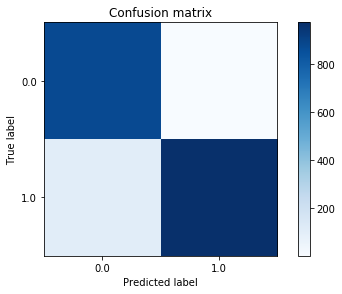


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9042988741044012
Confusion matrix
[[793   0]
 [187 974]]


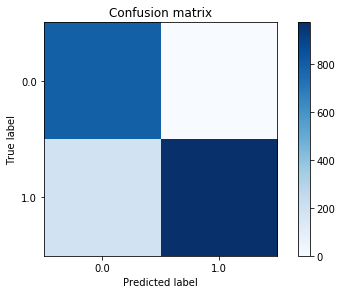


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.5440122824974412
Confusion matrix
[[ 89   0]
 [891 974]]


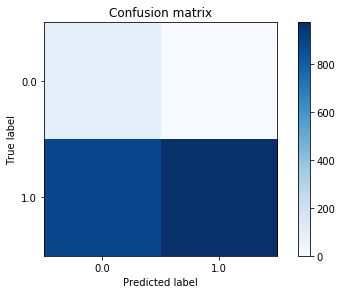


---------------------------------------------------------


In [0]:
model.insert(3,model3)
create_dist(test_images_h3,test_label_h3,3)

# Classification of 6 and 9
*Model 4*

In [0]:
train_images_h4=np.empty([11867,28,28])
test_images_h4=np.empty([1967,28,28])
train_label_h4=np.empty([11867,])
test_label_h4=np.empty([1967,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==6:   
    train_label_h4[j]=0
    train_images_h4[j]=train_images[i]
    j=j+1
  elif train_label[i]==9:
    train_label_h4[j]=1
    train_images_h4[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==6:   
    test_label_h4[j]=0
    test_images_h4[j]=test_images[i]
    j=j+1
  elif test_label[i]==9:
    test_label_h4[j]=1
    test_images_h4[j]=test_images[i]
    j=j+1
print(j)   

11867
1967


In [0]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model4.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model4.fit(train_images_h4, train_label_h4, epochs=5)

Epoch 1/5
11867/11867 [==============================] - 1s 91us/sample - loss: 0.0178 - acc: 0.9960
Epoch 2/5
11867/11867 [==============================] - 1s 84us/sample - loss: 0.0044 - acc: 0.9985
Epoch 3/5
11867/11867 [==============================] - 1s 81us/sample - loss: 0.0020 - acc: 0.9996
Epoch 4/5
11867/11867 [==============================] - 1s 83us/sample - loss: 0.0012 - acc: 0.9997
Epoch 5/5
11867/11867 [==============================] - 1s 85us/sample - loss: 6.2513e-04 - acc: 0.9997


In [0]:
test_loss, test_acc = model4.evaluate(test_images_h4, test_label_h4)
print('Test accuracy:', test_acc)

1967/1967 [==============================] - 0s 71us/sample - loss: 0.0104 - acc: 0.9969
Test accuracy: 0.9969497


Distortion:  0                    Accuracy:   0.9969496695475343
Confusion matrix
[[ 956    4]
 [   2 1005]]


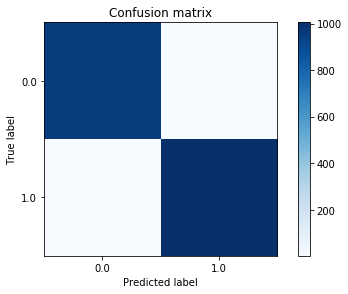


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.99644128113879
Confusion matrix
[[ 955    4]
 [   3 1005]]


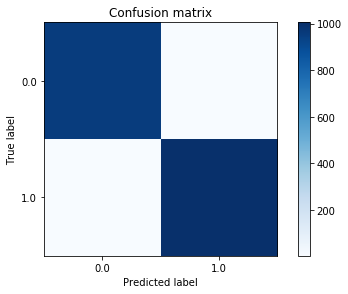


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9959328927300457
Confusion matrix
[[ 953    3]
 [   5 1006]]


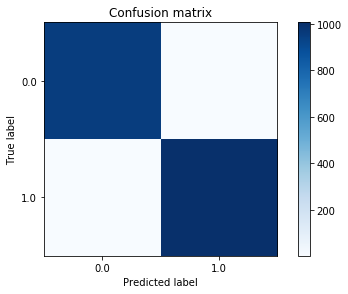


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.9938993390950687
Confusion matrix
[[ 950    4]
 [   8 1005]]


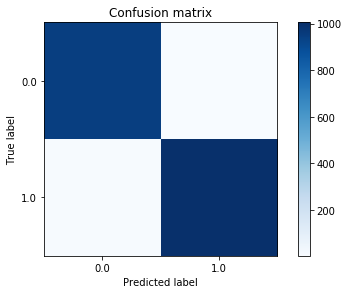


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.9944077275038129
Confusion matrix
[[ 950    3]
 [   8 1006]]


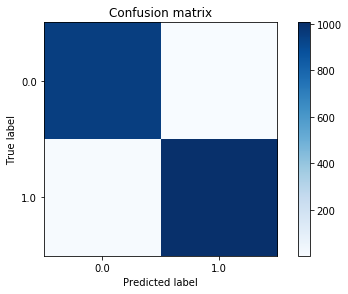


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.9893238434163701
Confusion matrix
[[ 942    5]
 [  16 1004]]


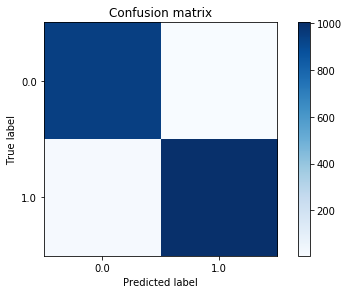


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.9705134722928317
Confusion matrix
[[ 906    6]
 [  52 1003]]


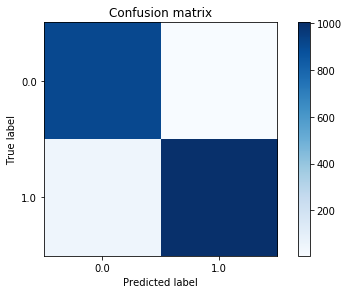


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.9567869852567361
Confusion matrix
[[ 876    3]
 [  82 1006]]


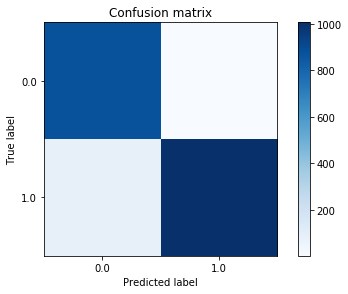


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.9313675648195221
Confusion matrix
[[ 827    4]
 [ 131 1005]]


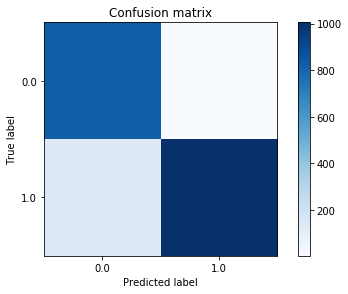


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.6873411286222674
Confusion matrix
[[355  12]
 [603 997]]


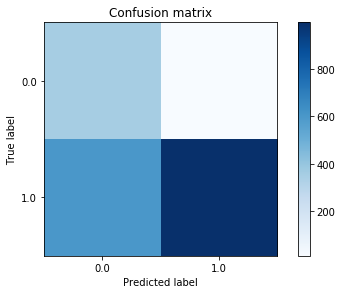


---------------------------------------------------------


In [0]:
model.insert(4,model4)
create_dist(test_images_h4,test_label_h4,4)

# Classification of 147 and 235
*Model 5*

In [0]:
train_no=36359
test_no=6079
train_images_h5=np.empty([train_no,28,28])
test_images_h5=np.empty([test_no,28,28])
train_label_h5=np.empty([train_no,])
test_label_h5=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==1 or train_label[i]==4 or train_label[i]==7:   
    train_label_h5[j]=0
    train_images_h5[j]=train_images[i]
    j=j+1
  elif train_label[i]==2 or train_label[i]==3 or train_label[i]==5:
    train_label_h5[j]=1
    train_images_h5[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==1 or test_label[i]==4 or test_label[i]==7:   
    test_label_h5[j]=0
    test_images_h5[j]=test_images[i]
    j=j+1
  elif test_label[i]==2 or test_label[i]==3 or test_label[i]==5:
    test_label_h5[j]=1
    test_images_h5[j]=test_images[i]
    j=j+1
print(j)   

36359
6079


In [0]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.softmax)
])
model5.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model5.fit(train_images_h5, train_label_h5, epochs=5)

Epoch 1/5
36359/36359 [==============================] - 3s 85us/sample - loss: 0.0568 - acc: 0.9817
Epoch 2/5
36359/36359 [==============================] - 3s 87us/sample - loss: 0.0223 - acc: 0.9929
Epoch 3/5
36359/36359 [==============================] - 3s 87us/sample - loss: 0.0151 - acc: 0.9950
Epoch 4/5
36359/36359 [==============================] - 3s 84us/sample - loss: 0.0091 - acc: 0.9972
Epoch 5/5
36359/36359 [==============================] - 3s 83us/sample - loss: 0.0065 - acc: 0.9980


In [0]:
test_loss, test_acc = model5.evaluate(test_images_h5, test_label_h5)
print('Test accuracy:', test_acc)

6079/6079 [==============================] - 0s 75us/sample - loss: 0.0258 - acc: 0.9936
Test accuracy: 0.99358445


In [0]:
model5.predict(test_images_h5).shape

(6079, 2)

Distortion:  0                    Accuracy:   0.99358447113012
Confusion matrix
[[3124   18]
 [  21 2916]]


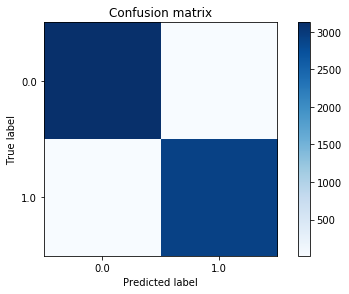


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.9925974666886
Confusion matrix
[[3118   18]
 [  27 2916]]


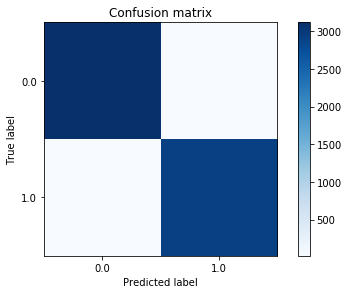


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.9837144267149203
Confusion matrix
[[3059   13]
 [  86 2921]]


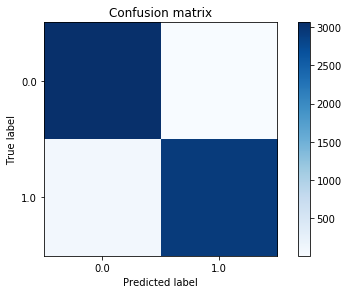


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.928442177989801
Confusion matrix
[[2719    9]
 [ 426 2925]]


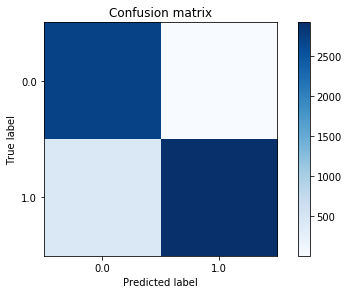


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8188846849810825
Confusion matrix
[[2047    3]
 [1098 2931]]


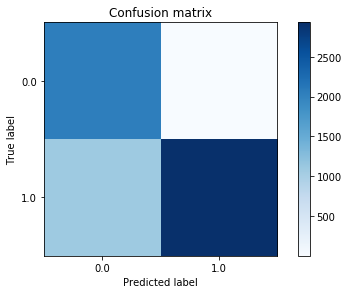


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7050501727257773
Confusion matrix
[[1357    5]
 [1788 2929]]


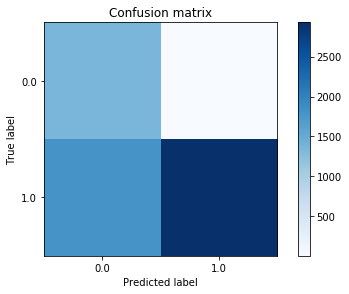


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.5775620990294457
Confusion matrix
[[ 578    1]
 [2567 2933]]


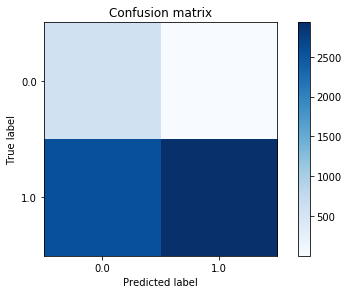


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.5405494324724461
Confusion matrix
[[ 353    1]
 [2792 2933]]


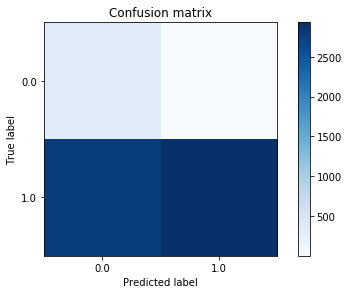


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.5194933377200197
Confusion matrix
[[ 224    0]
 [2921 2934]]


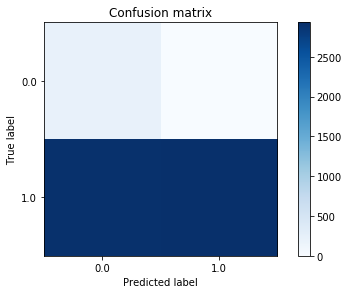


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.4828096726435269
Confusion matrix
[[   1    0]
 [3144 2934]]


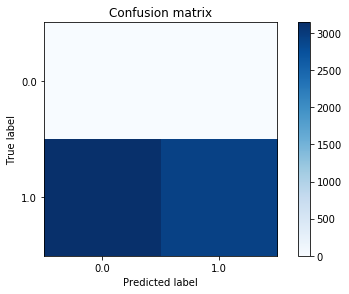


---------------------------------------------------------


In [0]:
model.insert(5,model5)
create_dist(test_images_h5,test_label_h5,5)

#Multiclass of 147
*Model 6*

In [0]:
train_no=18849
test_no=2972
train_images_h6=np.empty([train_no,28,28])
test_images_h6=np.empty([test_no,28,28])
train_label_h6=np.empty([train_no,])
test_label_h6=np.empty([test_no,])

In [0]:
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])
model6.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
train_images_h6.shape

(18849, 28, 28)

In [0]:
j=0
for i in range(60000):
  if train_label[i]==1:   
    train_label_h6[j]=0
    train_images_h6[j]=train_images[i]
    j=j+1
  elif train_label[i]==4:
    train_label_h6[j]=1
    train_images_h6[j]=train_images[i]
    j=j+1
  elif  train_label[i]==7:
    train_label_h6[j]=2
    train_images_h6[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==1:   
    test_label_h6[j]=0
    test_images_h6[j]=test_images[i]
    j=j+1
  elif test_label[i]==4:
    test_label_h6[j]=1
    test_images_h6[j]=test_images[i]
    j=j+1
  elif  train_label[i]==7:
    test_label_h6[j]=2
    test_images_h6[j]=test_images[i]
    j=j+1
print(j)

18849
2972


In [0]:
model6.fit(train_images_h6, train_label_h6, epochs=5)

Epoch 1/5
18849/18849 [==============================] - 2s 86us/sample - loss: 0.0587 - acc: 0.9835
Epoch 2/5
18849/18849 [==============================] - 2s 80us/sample - loss: 0.0258 - acc: 0.9924
Epoch 3/5
18849/18849 [==============================] - 2s 83us/sample - loss: 0.0163 - acc: 0.9949
Epoch 4/5
18849/18849 [==============================] - 2s 86us/sample - loss: 0.0108 - acc: 0.9970
Epoch 5/5
18849/18849 [==============================] - 2s 85us/sample - loss: 0.0089 - acc: 0.9972


In [0]:
test_loss, test_acc = model6.evaluate(test_images_h6, test_label_h6)
print('Test accuracy:', test_acc)

2972/2972 [==============================] - 0s 71us/sample - loss: 1.1709 - acc: 0.8486
Test accuracy: 0.8485868


Distortion:  0                    Accuracy:   0.8485868102288021
Confusion matrix
[[1130    1  181]
 [   2  981  263]
 [   3    0  411]]


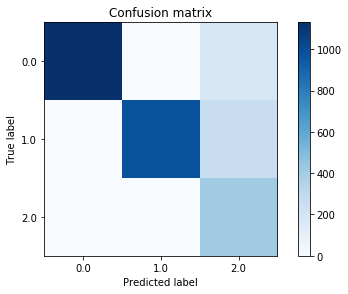


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.8475773889636609
Confusion matrix
[[1130    1  180]
 [   2  981  267]
 [   3    0  408]]


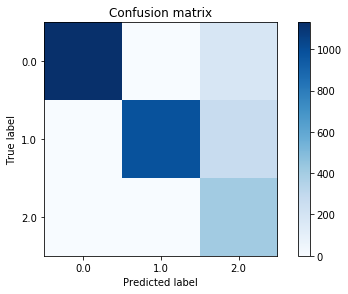


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8442126514131898
Confusion matrix
[[1121    1  173]
 [   4  977  271]
 [  10    4  411]]


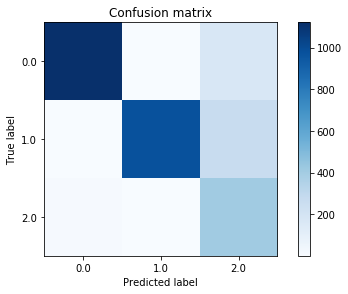


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.84185733512786
Confusion matrix
[[1113    1  170]
 [   4  968  264]
 [  18   13  421]]


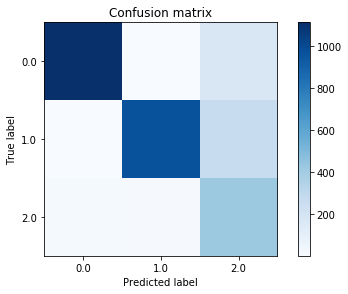


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8193135935397039
Confusion matrix
[[1053    0  160]
 [   6  962  275]
 [  76   20  420]]


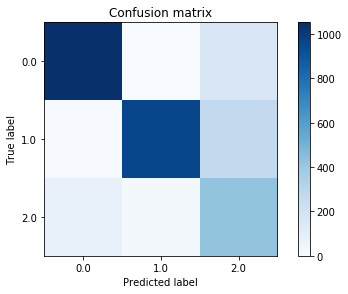


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.7964333781965006
Confusion matrix
[[985   1 148]
 [ 19 954 279]
 [131  27 428]]


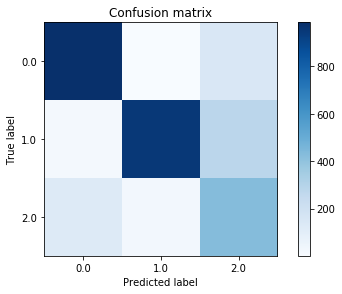


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7220726783310901
Confusion matrix
[[796   1 136]
 [ 60 920 289]
 [279  61 430]]


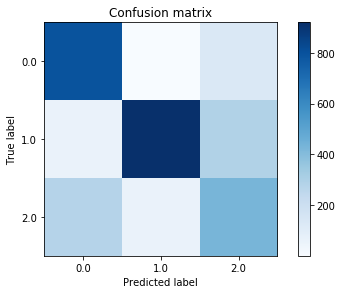


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6901076716016151
Confusion matrix
[[716   2 113]
 [ 79 898 305]
 [340  82 437]]


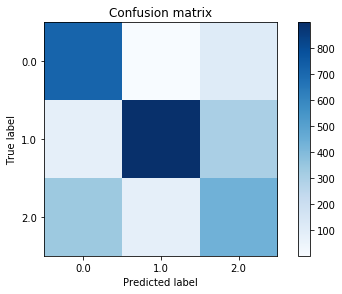


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6322341857335128
Confusion matrix
[[561   3 103]
 [143 880 314]
 [431  99 438]]


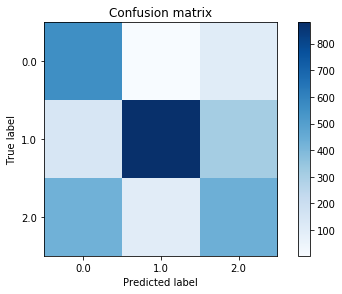


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.446164199192463
Confusion matrix
[[135   3  34]
 [506 807 437]
 [494 172 384]]


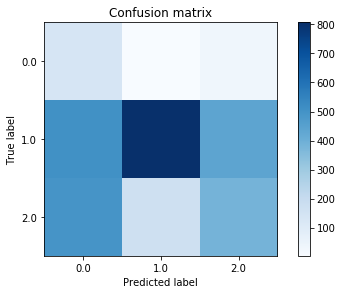


---------------------------------------------------------


In [0]:
model.insert(6,model6)
create_dist(test_images_h6,test_label_h6,6)

#Multiclass of 235
*Model 7*

In [0]:
train_no=17510
test_no=2722
train_images_h7=np.empty([train_no,28,28])
test_images_h7=np.empty([test_no,28,28])
train_label_h7=np.empty([train_no,])
test_label_h7=np.empty([test_no,])

In [0]:
j=0
for i in range(60000):
  if train_label[i]==2:   
    train_label_h7[j]=0
    train_images_h7[j]=train_images[i]
    j=j+1
  elif train_label[i]==3:
    train_label_h7[j]=1
    train_images_h7[j]=train_images[i]
    j=j+1
  elif  train_label[i]==5:
    train_label_h7[j]=2
    train_images_h7[j]=train_images[i]
    j=j+1
print(j)    
j=0
for i in range(10000):
  if test_label[i]==2:   
    test_label_h7[j]=0
    test_images_h7[j]=test_images[i]
    j=j+1
  elif test_label[i]==3:
    test_label_h7[j]=1
    test_images_h7[j]=test_images[i]
    j=j+1
  elif  train_label[i]==5:
    test_label_h7[j]=2
    test_images_h7[j]=test_images[i]
    j=j+1
print(j)

17510
2722


In [0]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])
model7.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model7.fit(train_images_h7, train_label_h7, epochs=5)

Epoch 1/5
17510/17510 [==============================] - 2s 90us/sample - loss: 0.1492 - acc: 0.9491
Epoch 2/5
17510/17510 [==============================] - 2s 87us/sample - loss: 0.0581 - acc: 0.9810
Epoch 3/5
17510/17510 [==============================] - 2s 86us/sample - loss: 0.0342 - acc: 0.9888
Epoch 4/5
17510/17510 [==============================] - 1s 85us/sample - loss: 0.0243 - acc: 0.9919
Epoch 5/5
17510/17510 [==============================] - 2s 92us/sample - loss: 0.0160 - acc: 0.9954


In [0]:
test_loss, test_acc = model7.evaluate(test_images_h7, test_label_h7)
print('Test accuracy:', test_acc)

2722/2722 [==============================] - 0s 58us/sample - loss: 0.8645 - acc: 0.8259
Test accuracy: 0.82586336


Distortion:  0                    Accuracy:   0.8332108743570904
Confusion matrix
[[1013    1  154]
 [  17 1003  274]
 [   2    6  252]]


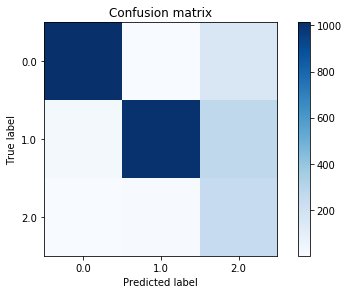


---------------------------------------------------------
Distortion:  0.01                    Accuracy:   0.8350477590007348
Confusion matrix
[[1014    1  165]
 [  16 1002  258]
 [   2    7  257]]


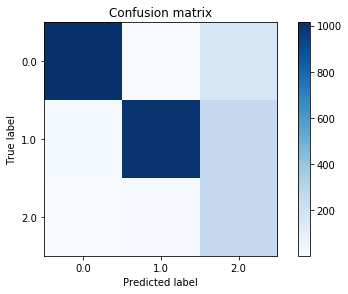


---------------------------------------------------------
Distortion:  0.05                    Accuracy:   0.8346803820720059
Confusion matrix
[[1015    3  171]
 [  14  993  245]
 [   3   14  264]]


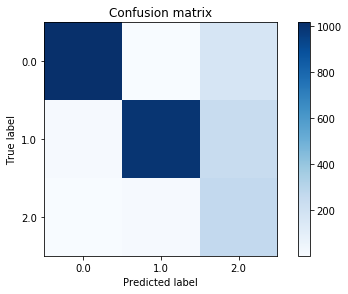


---------------------------------------------------------
Distortion:  0.1                    Accuracy:   0.8258633357825128
Confusion matrix
[[1009    6  203]
 [  20  979  217]
 [   3   25  260]]


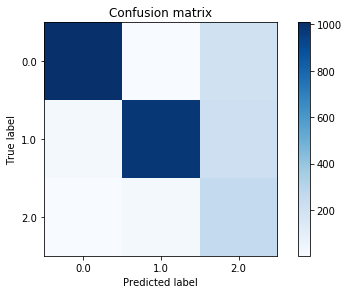


---------------------------------------------------------
Distortion:  0.15                    Accuracy:   0.8218221895664952
Confusion matrix
[[1000   13  215]
 [  23  949  177]
 [   9   48  288]]


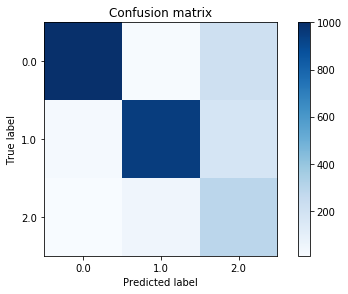


---------------------------------------------------------
Distortion:  0.2                    Accuracy:   0.8030859662013226
Confusion matrix
[[997  34 231]
 [ 19 893 153]
 [ 16  83 296]]


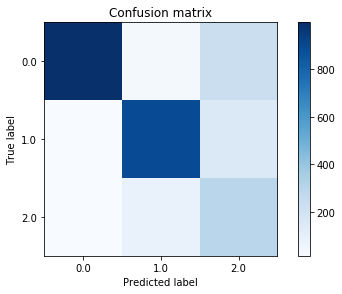


---------------------------------------------------------
Distortion:  0.3                    Accuracy:   0.7373254959588538
Confusion matrix
[[951  74 238]
 [ 29 710  96]
 [ 52 226 346]]


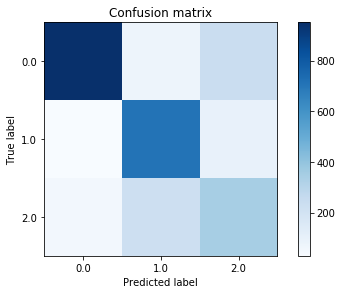


---------------------------------------------------------
Distortion:  0.35                    Accuracy:   0.6851579720793534
Confusion matrix
[[923  93 220]
 [ 19 569  87]
 [ 90 348 373]]


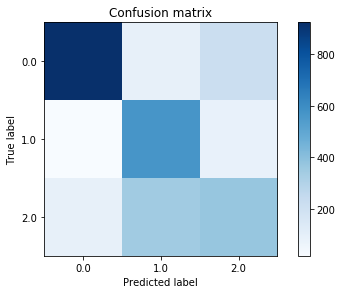


---------------------------------------------------------
Distortion:  0.4                    Accuracy:   0.6377663482733285
Confusion matrix
[[889 110 205]
 [ 11 430  58]
 [132 470 417]]


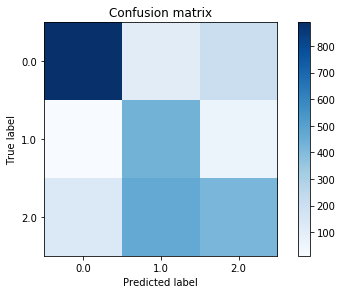


---------------------------------------------------------
Distortion:  0.7                    Accuracy:   0.35745775165319615
Confusion matrix
[[399 106 109]
 [  0   4   1]
 [633 900 570]]


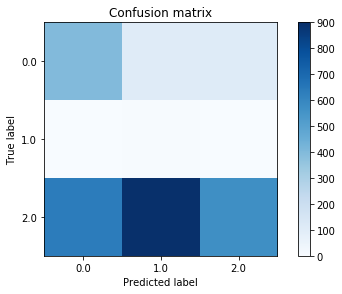


---------------------------------------------------------


In [0]:
model.insert(7,model7)
create_dist(test_images_h7,test_label_h7,7)

#Final Compilation

The function predict_for predicts the value of kth test image in hierarchical manner

In [0]:
def predict_for_one(k):
  if model1.predict(test_images[k-1:k])[:,0]>.5:
    print("It doesn't have a circle")
    if  model5.predict(test_images[k-1:k])[:,0]>(1/2):
      print("It has straight lines")
      if model6.predict(test_images[k-1:k])[:,0]>(1/3):
        print("It is 1")
      elif model6.predict(test_images[k-1:k])[:,1]>(1/3):
        print("It is 4")
      else:
        print("It is 7")
    else:
      print("It has curves")
      if model7.predict(test_images[k-1:k])[:,0]>(1/3):
        print("It is 2")
      elif model7.predict(test_images[k-1:k])[:,1]>(1/3):
        print("It is 3")
      else:
        print("It is 5")

  else:
    print("It has a circle")
    if model2.predict(test_images[k-1:k])[:,0]>.5:
      print("It is 0 or 8")
      if model3.predict(test_images[k-1:k])[:,0]>.5:
        print("It is 0")
      else:
        print("It is 8")
    else:
      print("It is 6 or 9")
      if model4.predict(test_images[k-1:k])[:,0]>.5:
        print("It is 6")
      else:
        print("It is 9")
  print()

In [0]:
for k in range(1,9):
  predict_for_one(k)

It doesn't have a circle
It has straight lines
It is 7

It doesn't have a circle
It has curves
It is 2

It doesn't have a circle
It has straight lines
It is 1

It has a circle
It is 0 or 8
It is 0

It doesn't have a circle
It has straight lines
It is 4

It doesn't have a circle
It has straight lines
It is 1

It doesn't have a circle
It has straight lines
It is 4

It has a circle
It is 6 or 9
It is 9



for checking the accuracy

In [0]:
def predict_for(ar,k):
  if model1.predict(test_images[k-1:k])[:,0]>.5:
    if  model5.predict(test_images[k-1:k])[:,0]>(1/2):
      if model6.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=1
        
      elif model6.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=4
        
      else:
        ar[k-1]=7
        
    else:
      if model7.predict(test_images[k-1:k])[:,0]>(1/3):
        ar[k-1]=2
        
      elif model7.predict(test_images[k-1:k])[:,1]>(1/3):
        ar[k-1]=3
        
      else:
        ar[k-1]=5
        

  else:
    if model2.predict(test_images[k-1:k])[:,0]>.5:
      if model3.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=0
        
      else:
        ar[k-1]=8
        
    else:
      if model4.predict(test_images[k-1:k])[:,0]>.5:
        ar[k-1]=6
        
      else:
        ar[k-1]=9

In [0]:
ar=np.empty([10000])
for i in range(1,10001):
  predict_for(ar,i)

In [0]:
ar

array([7., 2., 1., ..., 4., 5., 6.])

In [0]:
accuracy_score(ar,test_label)

0.9717

#Adversarial Check

I tried creating adversarial examples by reducing pixel intensities.

In [0]:
adversarial=np.empty([1,28,28])

In [0]:
def predict_for_adver(k):
  if model1.predict(adversarial)[:,0]>.5:
    print("It doesn't have a circle")
    if  model5.predict(adversarial)[:,0]>(1/2):
      print("It has straight lines")
      if model6.predict(adversarial)[:,0]>(1/3):
        print("It is 1")
      elif model6.predict(adversarial)[:,1]>(1/3):
        print("It is 4")
      else:
        print("It is 7")
    else:
      print("It has curves")
      if model7.predict(adversarial)[:,0]>(1/3):
        print("It is 2")
      elif model7.predict(adversarial)[:,1]>(1/3):
        print("It is 3")
      else:
        print("It is 5")

  else:
    print("It has a circle")
    if model2.predict(adversarial)[:,0]>.5:
      print("It is 0 or 8")
      if model3.predict(adversarial)[:,0]>.5:
        print("It is 0")
      else:
        print("It is 8")
    else:
      print("It is 6 or 9")
      if model4.predict(adversarial)[:,0]>.5:
        print("It is 6")
      else:
        print("It is 9")
  print()

It doesn't have a circle
It has curves
It is 2

Adv. Image:


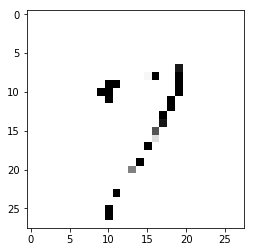

It doesn't have a circle
It has straight lines
It is 7

Clean Image:


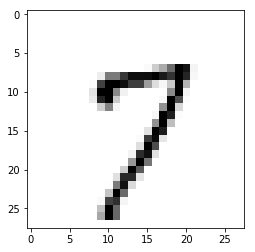

In [0]:
epsilon=0.95                                                                    #Give epsilon any value between 0 and 1
k=random.randint(0,9999)
for i in range(28):
  for j in range(28):
    adversarial[0,j,i]=max(test_images[k,j,i]-epsilon,0)
predict_for_adver(k)
print("Adv. Image:")
plt.imshow(adversarial[0], cmap='Greys')
plt.show()

predict_for_one(k+1)
print("Clean Image:")
plt.imshow(test_images[k], cmap='Greys')
plt.show()

#Random adversaries

In [0]:
test=np.empty([10000,28,28])
for i in range(10000):
  for j in range(28):
    for k in range(28):
      test[i][j][k]=test_images[i][j][k]
test=test.reshape(10000,784)

def distort(distortion,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s=np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test.reshape(1,28,28)

def predict():
  predictedarr=np.empty(10000)
  for j in range(10000):
    arr=(model.predict(dist_test[j].reshape(1,28,28))[0])
    for i in range (10):
      if max(arr)==arr[i]:
        predictedarr[j]=i
  return predictedarr

In [0]:
def predict_array(ar,k):
  if model1.predict(dist_test[k-1:k])[:,0]>=.5:
    if  model5.predict(dist_test[k-1:k])[:,0]>=(1/2):
      if model6.predict(dist_test[k-1:k])[:,0]>=(1/3):
        ar[k-1]=1
        
      elif model6.predict(dist_test[k-1:k])[:,1]>=(1/3):
        ar[k-1]=4
        
      elif model6.predict(dist_test[k-1:k])[:,2]>=(1/3):
        ar[k-1]=7
        
    else:
      if model7.predict(dist_test[k-1:k])[:,0]>=(1/3):
        ar[k-1]=2
        
      elif model7.predict(dist_test[k-1:k])[:,1]>=(1/3):
        ar[k-1]=3
        
      elif model7.predict(dist_test[k-1:k])[:,2]>=(1/3):
        ar[k-1]=5


  else:
    if model2.predict(dist_test[k-1:k])[:,0]>=.5:
      if model3.predict(dist_test[k-1:k])[:,0]>=.5:
        ar[k-1]=0
        
      elif model3.predict(dist_test[k-1:k])[:,1]>=.5:
        ar[k-1]=8
        
    else:
      if model4.predict(dist_test[k-1:k])[:,0]>=.5:
        ar[k-1]=6
        
      elif model4.predict(dist_test[k-1:k])[:,1]>=.5:
        ar[k-1]=9

In [0]:
def Hdistort(test,distortion,i):
  dist_test=np.empty([784])
  for j in range(784):
    dist_test[j]=test[i][j]
  s=np.random.choice(784, (int)(784*distortion),replace=False)
  for k in s:
    dist_test[k]=random.randint(0,254)/255
  return dist_test.reshape(1,28,28)

def createdist(test_images,test_label,distortion_list):
  dist_test = np.empty([10000,28,28])
  acc = []
  
  test=np.empty([10000,28,28])
  for i in range(10000):
    for j in range(28):
      for k in range(28):
        test[i][j][k]=test_images[i][j][k]
  test=test.reshape(10000,784)
  
  for j,distortion in enumerate(distortion_list):
    dist_test = np.empty([10000,28,28])
    for i in range(10000):
      dist_test[i] = Hdistort(test,distortion,i)
    pred=np.empty([10000])
    for i in range(1,10001):
      predict_array(pred,i)
    test_acc=accuracy_score(pred,test_label)
    acc.insert(j,test_acc)
    print("Distortion: ",distortion,"                  ","Accuracy:  ",test_acc)
    print(confusion_matrix(pred,test_label))
    print()
    print("---------------------------------------------------------")

In [0]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def colourmat(pred,test_label,inputs):
  cm = confusion_matrix(pred, test_label)
  np.set_printoptions(precision=2)
  print('Confusion matrix')
  print(cm)
  plt.figure()
  plot_confusion_matrix(cm,inputs, title='Confusion matrix')
  plt.show()


Distortion:  0       |       Accuracy:   0.9723
Normalized confusion matrix
[[ 965    2    4    0    1    5    6    0   10    1]
 [   0 1118    2    0    0    0    3    2    0    1]
 [   1    4 1010   10    1    0    0    7    7    1]
 [   0    0    0  978    1    8    1    2    1    5]
 [   1    1    1    0  939    1    3    2    3    4]
 [   3    1    1    8    0  868    8    0   10    6]
 [   6    3    2    0   17    4  933    0    7    2]
 [   1    0    8    7    1    0    0 1007    4    4]
 [   3    6    4    4    2    3    4    0  924    4]
 [   0    0    0    3   20    3    0    8    8  981]]


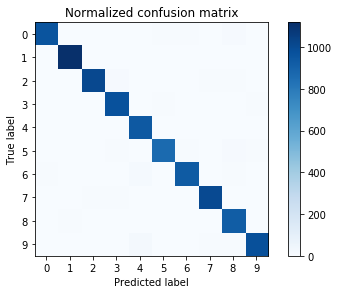


_____________________________________________________

Distortion:  0.01       |       Accuracy:   0.9698
Normalized confusion matrix
[[ 965    0    4    0    1    5    6    0    9    1]
 [   0 1118    2    0    0    0    2    2    0    2]
 [   3    4 1013   14    1    0    1    9    7    0]
 [   0    1    1  972    1    8    1    3    5    7]
 [   1    1    1    0  935    1    3    3    3    5]
 [   2    1    1    9    0  866    8    0    9    6]
 [   5    3    2    0   20    3  932    0    7    2]
 [   1    0    6    7    1    0    1  999    4    5]
 [   2    6    2    2    2    4    4    0  921    4]
 [   1    1    0    6   21    5    0   12    9  977]]


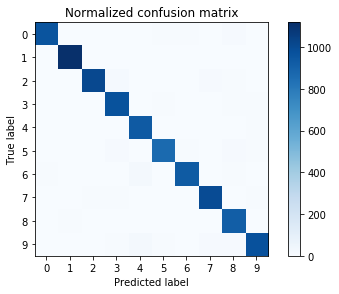


_____________________________________________________

Distortion:  0.05       |       Accuracy:   0.9491
Normalized confusion matrix
[[ 945    1    3    0    1    4    2    0    6    0]
 [   0 1087    2    0    0    0    1    2    0    3]
 [   9   12 1009   24    5    1    3   23   16    1]
 [   0    5    1  948    2    5    1    5   15   10]
 [   1    0    2    1  888    1    4    3    2    9]
 [   4    3    1   17    4  865   23    3   11   10]
 [  12    7    4    0   27    8  922    1   15    4]
 [   3    6    5    7    3    0    1  976    4   10]
 [   3   11    5    7    5    4    1    0  893    4]
 [   3    3    0    6   47    4    0   15   12  958]]


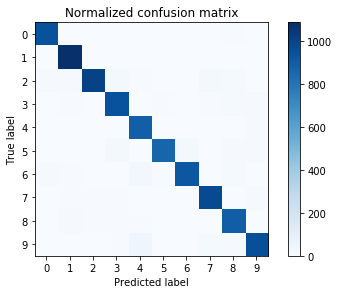


_____________________________________________________

Distortion:  0.1       |       Accuracy:   0.8854
Normalized confusion matrix
[[ 931    0    2    0    1    3    2    0    7    1]
 [   0  848    0    0    0    0    0    0    1    3]
 [  18  141 1012   72   23    6   13   65   48   13]
 [   1   37    1  877    8    3    1   10   21   13]
 [   4    1    0    0  773    0    6   11    2   13]
 [   7   42    2   42   19  863   33    8   24   32]
 [  13   16    4    1   50    7  897    0   15    4]
 [   0   21    4    3    3    0    0  919    3   20]
 [   2   17    7   10    5    4    5    0  828    4]
 [   4   12    0    5  100    6    1   15   25  906]]


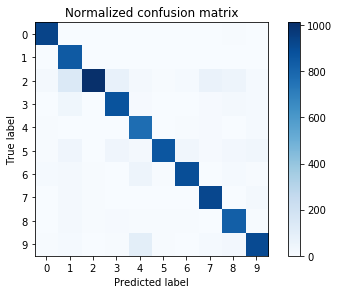


_____________________________________________________

Distortion:  0.15       |       Accuracy:   0.7764
Normalized confusion matrix
[[839   0   3   0   2   0   2   1   3   0]
 [  0 419   0   0   0   0   0   0   0   0]
 [ 61 435 999 134  73  13  24 145  80  38]
 [  1  53   0 774   9   8   0  13  19  17]
 [  2   3   0   0 611   0   3   3   1  20]
 [ 18 116   3  83  53 849  47  25  59  70]
 [ 33  32  14   0  80   7 877   0  22   4]
 [  1  33   1   3   5   0   1 826   3  38]
 [  5  20  10   8   3   6   3   1 752   4]
 [ 20  24   2   8 146   9   1  14  35 818]]


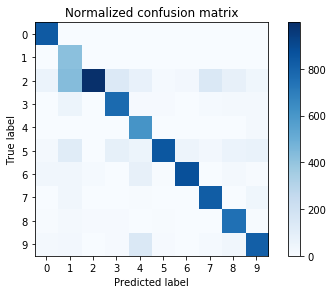


_____________________________________________________

Distortion:  0.2       |       Accuracy:   0.6536
Normalized confusion matrix
[[747   0   1   0   2   0   1   0   1   0]
 [  0 149   0   0   0   0   0   0   0   0]
 [ 96 689 984 223 132  43  45 278 172  79]
 [  0  52   0 617   3   3   1  19  22  20]
 [  0   5   2   0 440   0   6  12   1  17]
 [ 35 147   3 152  76 814  65  49  80 134]
 [ 60  22  16   2 102  17 836   3  39   6]
 [  2  22   6   3  11   0   1 647   1  40]
 [  2  13   9   7   6   6   2   0 592   3]
 [ 38  36  11   6 210   9   1  20  66 710]]


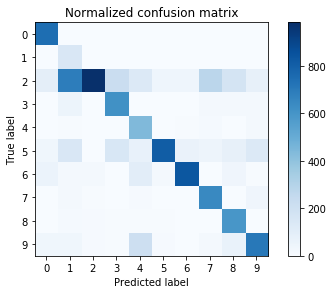


_____________________________________________________

Distortion:  0.3       |       Accuracy:   0.4506
Normalized confusion matrix
[[407   0   2   0   0   1   0   0   0   0]
 [  0  14   0   0   0   0   0   0   0   0]
 [292 846 978 421 245 117 160 526 308 217]
 [  0   8   0 286   1   0   0   5  14  11]
 [  5   8   0   0 217   0   4   5   0   9]
 [ 76 174  10 284 134 748 103 117 153 233]
 [104  33  27   1 129   9 687   3  65  15]
 [  5   6   1   1   8   0   2 345   1  33]
 [  5   7   7   5   4   7   0   0 334   1]
 [ 86  39   7  12 244  10   2  27  99 490]]


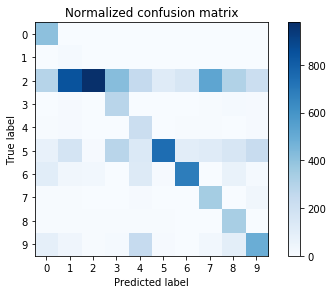


_____________________________________________________

Distortion:  0.35       |       Accuracy:   0.3697
Normalized confusion matrix
[[270   0   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0]
 [332 851 961 487 293 154 218 590 380 233]
 [  0   5   0 151   1   0   0   0   8  12]
 [  7   0   2   0 148   1   5   5   1  12]
 [134 189  21 355 144 716 141 162 186 311]
 [139  41  31   0 148  11 586   1  73  19]
 [ 10   5   1   3  13   0   1 250   1  20]
 [  6   7   4   2   1   2   1   1 212   2]
 [ 82  34  12  12 234   8   6  19 113 400]]


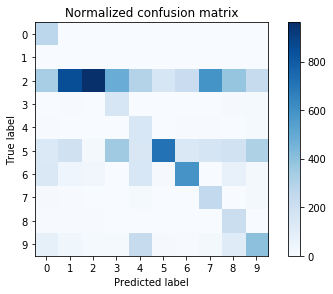


_____________________________________________________

Distortion:  0.4       |       Accuracy:   0.3039
Normalized confusion matrix
[[179   0   1   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0]
 [403 865 934 501 328 192 279 649 436 291]
 [  0   0   0  58   0   2   0   1   2   5]
 [  1   2   0   0  79   0   6   7   0  10]
 [169 212  39 438 184 679 174 183 216 344]
 [119  29  41   2 169   7 492   3  68  20]
 [  4   0   1   1  14   0   3 163   1  17]
 [  3   3   3   0   0   2   0   1 133   1]
 [102  23  13  10 208  10   4  21 118 321]]


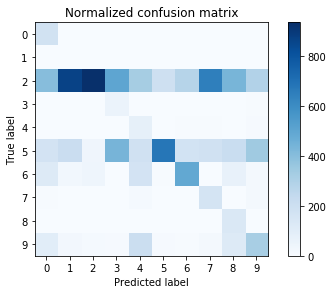


_____________________________________________________

Distortion:  0.7       |       Accuracy:   0.1416
Normalized confusion matrix
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [508 606 733 428 464 256 437 507 472 364]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   1   0   0   0]
 [455 522 287 582 451 631 486 513 494 623]
 [ 13   3  11   0  35   2  31   0   4   4]
 [  0   0   0   0   0   0   1   3   0   1]
 [  0   0   0   0   0   0   0   0   0   0]
 [  4   4   1   0  31   3   2   5   4  17]]


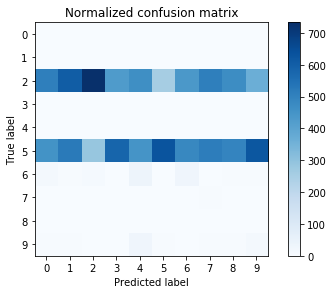


_____________________________________________________



In [0]:
distortion_list=[0,0.01,0.05,0.1,0.15,0.2,0.3,0.35,0.4,0.7]
dist_test=np.empty([10000,28,28])
acc=[]
for j,distortion in enumerate(distortion_list):
  dist_test=np.empty([10000,28,28])
  for i in range(10000):
    dist_test[i]=distort(distortion,i)
  pred=np.empty([10000])
  for i in range(1,10001):
    predict_array(pred,i)
  test_acc=accuracy_score(pred,test_label)
  acc.insert(j,test_acc)
  print("Distortion: ",distortion,"      |      ","Accuracy:  ",test_acc)
  colourmat(pred,test_label)
  print()
  print("_____________________________________________________")
  print()